В этом блоке проанализируем А/Б тест

Мы добавили на лендинг с оформлением дебетовой карты (https://www.tinkoff.ru/cards/debit-cards/tinkoff-black/) информацию о дополнительных кэшбеках, которые появляются благодаря нашим патнерам. Рассчитываем, что это вырастит конверсию из переходов на лендинг в оформление дебетовой карты. 

В приложенном файле вам доступны логи переходов на сайт и последующего оформления карточки за каждый день. 

In [1]:
# загрузим необходимые пакеты
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Загрузите таблицу в датафрейм

df = pd.read_csv('hw_ab.csv')

In [3]:
# Посмотрите на поля и проанализируйте таблицу: она содержит поля 
# date — дата захода пользователя на лендинг
# id — идентификатор, присвоенный пользователю
# group — группа теста или контроля
# converted – 1, если пользователь оформил карточку и 0, если не оформил

df.head()

,date,id,group,converted
0,2023-08-01,5030836,control,0
1,2023-08-01,5091425,control,0
2,2023-08-01,5106537,control,0
3,2023-08-01,4556522,control,0
4,2023-08-01,4002917,control,0


In [4]:
# убедимся,что пользователи уникальные
len(df)==df['id'].nunique()

True

In [5]:
# убедимся, что пользователей в тесте и контрле приблизительно равное количество, 
# в каждой группе каждый день теста были пользователи, и они как оформляли карту, так и нет

df.groupby('group').nunique()

,date,id,converted
group,,,
control,93,47330,2
test,93,47448,2


In [6]:
# отличаются ли конверсии в тесте и в контроле?

df[['group','converted','id']].groupby(['group','converted']).count()

id
group   converted       
control 0          42408
        1           4922
test    0          41774
        1           5674

In [7]:
# конверсия в контроле: 
4922/(4922+42408)

0.10399323896049018

In [8]:
# конверсия в тесте: 
5674/(5674+41774)

0.11958354409037261

In [9]:
# отношение конверсий: 

conv_test=sum(list(df.loc[df['group']=='test']['converted']))
seen_test=len(list(df.loc[df['group']=='test']['converted']))

conv_control=sum(list(df.loc[df['group']=='control']['converted']))
seen_control=len(list(df.loc[df['group']=='control']['converted']))

print((conv_test/seen_test)/(conv_control/seen_control)-1)

0.14991652616768292


In [ ]:
# значимо ли это отличие? 
# проверьте статистическим тестом

In [10]:
# сначала используем знание о том, что конверсии распределены биномиально: 
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

from scipy.stats import binom_test

binom_test(conv_test, seen_test-conv_test, conv_control/(seen_control-conv_control))

6.512476313977734e-35

In [ ]:
# конверсии отличаются значимо на 99+ уровне значимости

In [11]:
# достаточно ли длинным был тест, чтобы мы могли посчитать средние конверсии и сравнить значимость их различия? 
# посчитайте количество дней теста, убедитесь, что среди них нет пропусков

df['date'].nunique()

93

In [12]:
df['date'].unique()

array(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
       '2023-08-05', '2023-08-06', '2023-08-07', '2023-08-08',
       '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
       '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16',
       '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20',
       '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
       '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
       '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
       '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
       '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
       '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
       '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
       '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
       '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
       '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
       '2023-09-30', '2023-10-01', '2023-10-02', '2023-

In [13]:
# посчитайте количество открытых карт и средние конверсии по дням в тесте и в контроле:

res_by_day = df[['group','converted','date']].groupby(['group','date'], as_index=False).sum()
res_by_day

,group,date,converted
0,control,2023-08-01,45
1,control,2023-08-02,63
2,control,2023-08-03,60
3,control,2023-08-04,56
4,control,2023-08-05,54
...,...,...,...
181,test,2023-10-28,58
182,test,2023-10-29,67
183,test,2023-10-30,58
184,test,2023-10-31,68


In [14]:
res_by_day_conv = df[['group','converted','date']].groupby(['group','date'], as_index=False).mean()
res_by_day_conv

,group,date,converted
0,control,2023-08-01,0.087891
1,control,2023-08-02,0.123047
2,control,2023-08-03,0.109689
3,control,2023-08-04,0.115226
4,control,2023-08-05,0.105263
...,...,...,...
181,test,2023-10-28,0.109434
182,test,2023-10-29,0.124535
183,test,2023-10-30,0.120833
184,test,2023-10-31,0.133858


(0.0, 100.0)

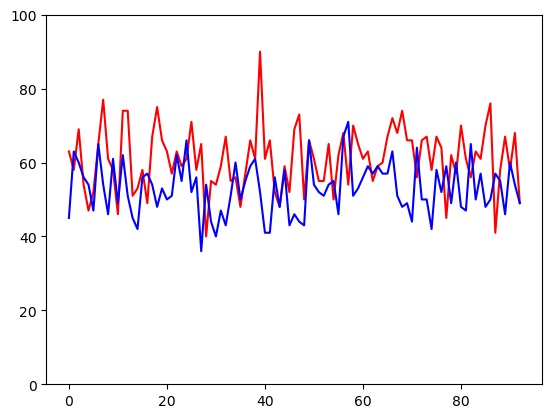

In [15]:
# построим график, отражающий количество оформленных карт по дням
test_n_by_date = list(res_by_day.loc[res_by_day['group']=='test']['converted'])
control_n_by_date = list(res_by_day.loc[res_by_day['group']=='control']['converted'])

sns.lineplot(data= test_n_by_date, color = "red")
sns.lineplot(data= control_n_by_date, color ="blue")

plt.ylim(0, 100)

(0.0, 0.2)

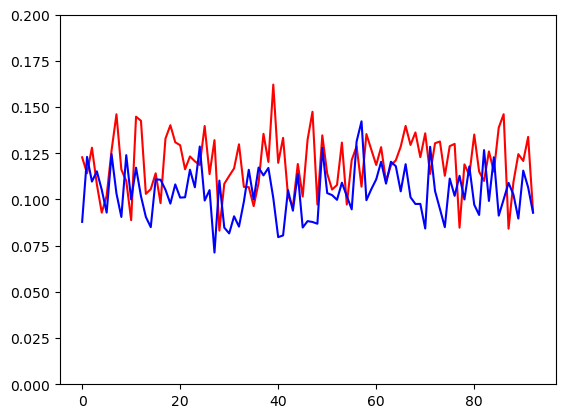

In [16]:
# построим график, отражающий конверсию из посещений в оформленние карт по дням
test_conv_by_date = list(res_by_day_conv.loc[res_by_day_conv['group']=='test']['converted'])
control_conv_by_date = list(res_by_day_conv.loc[res_by_day_conv['group']=='control']['converted'])


sns.lineplot(data= test_conv_by_date, color = "red")
sns.lineplot(data= control_conv_by_date, color ="blue")

plt.ylim(0, 0.2)

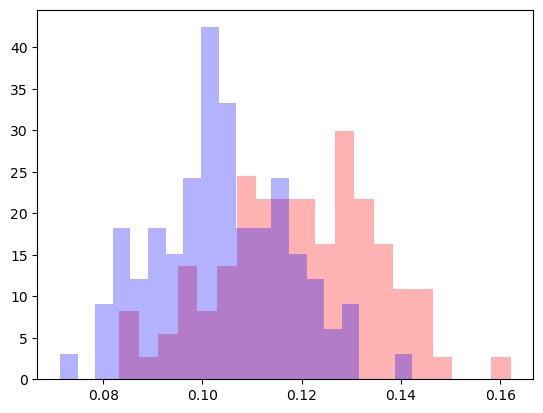

In [20]:
# построим распределения средних значений по дням в тесте и в контроле
# на что похоже это распределение?

plt.hist(test_conv_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_conv_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

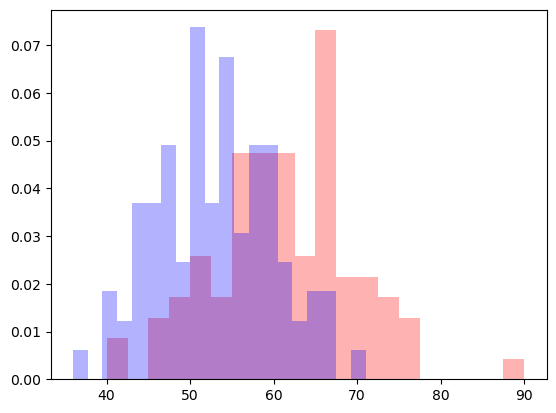

In [21]:
plt.hist(test_n_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_n_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

In [17]:
# теперь используем знание о том, что средние конверсии распределены нормально
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

from scipy.stats import ttest_ind

ttest_ind(test_conv_by_date, control_conv_by_date)


Ttest_indResult(statistic=7.209029622736518, pvalue=1.4124701519287306e-11)

In [18]:
# используйте тот же статистический тест, чтобы оценить, отличаются ли  и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

ttest_ind(test_n_by_date, control_n_by_date)

Ttest_indResult(statistic=7.048113433738303, pvalue=3.529180601649641e-11)

In [ ]:
# получаем, что по ttest средние по дням конверсии отличаются значимо